<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# **Covid-19 & Healthcare Resources Need**

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

This analysis is focused on identifying healthcare resource gap and prediction for better planning and deployment of resources based on a prediction system of the progression of the SARS-Covid 19 pandemic.
For this analysis data was obtained from Kaggles, Statista, The World Bank, Our World In Data.
<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

**Importing the important libraries for the data analysis.**
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [1]:
# importing library which we need in this analysis
import pandas            as pd  # import pandas
import matplotlib.pyplot as plt # import pyplot
import seaborn           as sns # import seaborn
import numpy             as np  # import numpy


# importing model types
import sklearn.linear_model                            # import sklearn linear model 
from sklearn.tree            import DecisionTreeRegressor     # import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor     # import RandomForestRegressor
from sklearn.ensemble        import GradientBoostingRegressor # import GradientBoostingRegressor 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing   import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import mean_squared_error # importing mean squared error
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Importing XGBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from scipy import stats
from scipy.stats import norm, skew 

# standard_scaler
from sklearn.preprocessing import StandardScaler # standard scaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


/Users/purveshchitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# pip install imbalanced-learn
# !pip install xgboost
# !pip install --upgrade xgboost

In [3]:
# import sys
# print(sys.executable)



In [4]:
# !{sys.executable} -m pip install xgboost


In [5]:
print(xgb.__version__)

2.1.2


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## **Importing the various datasets for analysis.**

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [6]:
chronic_illness = pd.read_csv("./Covid Data.csv")
chronic_illness.info()
# Print only the first 5 rows of chronic_illness
print(chronic_illness.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
physicians = pd.read_csv("./physicians-per-1000-people.csv")
physicians.info()
physicians.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         4939 non-null   object 
 1   Code                           4894 non-null   object 
 2   Year                           4939 non-null   int64  
 3   Physicians (per 1,000 people)  4939 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 154.5+ KB


Entity       Code  Year  Physicians (per 1,000 people)
Afghanistan  AFG   1960  0.035                            1
Norway       NOR   1984  2.200                            1
                   1994  2.785                            1
                   1993  2.702                            1
                   1992  2.656                            1
                                                         ..
Germany      DEU   1998  3.182                            1
                   1997  3.139                            1
                   1996  3.124                            1
                   1995  3.075                            1
Zimbabwe     ZWE   2020  0.189                            1
Length: 4894, dtype: int64

In [8]:
# hospital_employees = pd.read_excel("./statistic_id185143_number-of-hospital-employees-in-the-us-2000-2023.xlsx", sheet_name = "Data")
# hospital_employees.info()
# print(hospital_employees.describe())

In [9]:
# Load the entire CSV
hospital_beds = pd.read_csv('./med_beds.csv')  # Adjust 'skiprows' to handle extra headers

hospital_beds.info()
print(hospital_beds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              62 non-null     int64  
 1   country                           62 non-null     object 
 2   country_code                      61 non-null     object 
 3   Hospital beds (per 1,000 people)  53 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB
    year        country country_code  Hospital beds (per 1,000 people)
0   1960  United States          USA                              9.20
1   1961  United States          USA                               NaN
2   1962  United States          USA                               NaN
3   1963  United States          USA                               NaN
4   1964  United States          USA                               NaN
..   ...            ...         

In [10]:
hospital_cap_state = pd.read_csv("./COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State__RAW__20241027.csv")
hospital_cap_state.info()
# hospital_cap_state.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 135 entries, state to date
dtypes: float64(50), int64(83), object(2)
memory usage: 57.1+ KB


In [11]:
# Display the total number of missing values across the entire DataFrame
total_nulls = hospital_cap_state.isnull().sum().sum()

# Display the count of null values per column
null_values_per_column = hospital_cap_state.isnull().sum()

# Display the counts as a DataFrame for better visualization
null_values_df = pd.DataFrame(null_values_per_column, columns=['Null Values'])
null_values_df.reset_index(inplace=True)
null_values_df.columns = ['Column', 'Null Values']

print("Total Null Values in DataFrame:", total_nulls)
print(null_values_df)

Total Null Values in DataFrame: 244
                                                Column  Null Values
0                                                state            0
1                 critical_staffing_shortage_today_yes            0
2                  critical_staffing_shortage_today_no            0
3        critical_staffing_shortage_today_not_reported            0
4    critical_staffing_shortage_anticipated_within_...            0
..                                                 ...          ...
130                staffed_pediatric_icu_bed_occupancy            0
131       staffed_pediatric_icu_bed_occupancy_coverage            0
132                   total_staffed_pediatric_icu_beds            0
133          total_staffed_pediatric_icu_beds_coverage            0
134                                               date            0

[135 rows x 2 columns]


In [12]:
columns_with_nulls = null_values_df[null_values_df['Null Values'] > 0]
print(columns_with_nulls)

                                                Column  Null Values
7                                 hospital_onset_covid            5
13                           inpatient_beds_used_covid            5
17        previous_day_admission_adult_covid_suspected            2
21    previous_day_admission_pediatric_covid_suspected            5
25   staffed_icu_adult_patients_confirmed_and_suspe...            5
29   total_adult_patients_hospitalized_confirmed_an...            5
33   total_pediatric_patients_hospitalized_confirme...            5
43                    percent_of_inpatients_with_covid            5
44           percent_of_inpatients_with_covid_coverage            5
45          percent_of_inpatients_with_covid_numerator            5
46        percent_of_inpatients_with_covid_denominator            5
47                     inpatient_bed_covid_utilization            5
48            inpatient_bed_covid_utilization_coverage            5
49           inpatient_bed_covid_utilization_num

In [13]:
# # Dictionary to store original null counts
# original_null_counts = {}

# # Record original null counts for columns with 1-5 nulls
# for column in hospital_cap_state.columns:
#     null_count = hospital_cap_state[column].isnull().sum()
    
#     if 1 <= null_count <= 5:  # Check if null count is between 1 and 5
#         original_null_counts[column] = null_count  # Store original null count

# # Fill NaN values with the median
# for column in original_null_counts.keys():
#     if hospital_cap_state[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
#         median_value = hospital_cap_state[column].median()
#         hospital_cap_state[column].fillna(median_value, inplace=True)

# # Check updated null counts
# updated_null_counts = {column: hospital_cap_state[column].isnull().sum() for column in original_null_counts.keys()}

# # Print original and updated null counts
# for column in original_null_counts.keys():
#     print(f"Column '{column}': Original Nulls: {original_null_counts[column]}, Updated Nulls: {updated_null_counts[column]}")

In [14]:
# # Summary statistics for filled columns
# filled_columns = original_null_counts.keys()
# hospital_cap_state[filled_columns].describe()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Exploratory Data Analysis

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [15]:
# Step 1: Identify and convert 'NaN' strings to real NaN
hospital_cap_state['adult_icu_bed_covid_utilization'] = hospital_cap_state['adult_icu_bed_covid_utilization'].replace('NaN', np.nan)

# Step 2: Check for null values
null_count = hospital_cap_state['adult_icu_bed_covid_utilization'].isna().sum()
print(f"Number of NaN values in 'adult_icu_bed_covid_utilization': {null_count}")

# Step 3: Replace NaN values with the median if any are found
if null_count > 0:
    median_value = hospital_cap_state['adult_icu_bed_covid_utilization'].median()
    hospital_cap_state['adult_icu_bed_covid_utilization'].fillna(median_value, inplace=True)
    print(f"Replaced NaN values with the median: {median_value}")
else:
    print("No NaN values found in 'adult_icu_bed_covid_utilization'.")

Number of NaN values in 'adult_icu_bed_covid_utilization': 5
Replaced NaN values with the median: 1.309328969


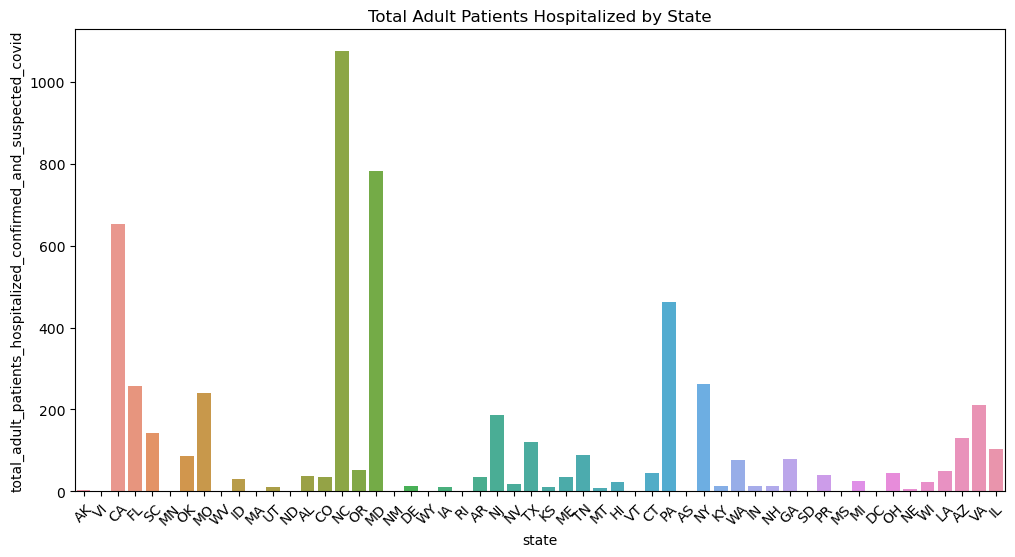

In [16]:
# Example of a bar plot for a specific column
plt.figure(figsize=(12, 6))
sns.barplot(data=hospital_cap_state, x='state', y='total_adult_patients_hospitalized_confirmed_and_suspected_covid')
plt.xticks(rotation=45)
plt.title('Total Adult Patients Hospitalized by State')
plt.show()

In [17]:
# Calculating correlations for 'adult_icu_bed_covid_utilization' with all other numerical columns.
correlations_with_icu = hospital_cap_state.corr(method = 'pearson').round(decimals = 2)['adult_icu_bed_covid_utilization'].sort_values(ascending=False)

# Extracting the top 10 correlations (excluding correlation with itself which will be 1.0)
top_10_correlations = correlations_with_icu[1:11]  # Skip the first value (self-correlation)

top_10_correlations


adult_icu_bed_covid_utilization_numerator                              0.87
staffed_icu_adult_patients_confirmed_and_suspected_covid               0.87
inpatient_bed_covid_utilization                                        0.68
percent_of_inpatients_with_covid                                       0.67
inpatient_beds_used_covid                                              0.49
inpatient_bed_covid_utilization_numerator                              0.49
percent_of_inpatients_with_covid_numerator                             0.49
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid    0.48
total_adult_patients_hospitalized_confirmed_and_suspected_covid        0.47
previous_day_admission_adult_covid_suspected_60_69                     0.47
Name: adult_icu_bed_covid_utilization, dtype: float64

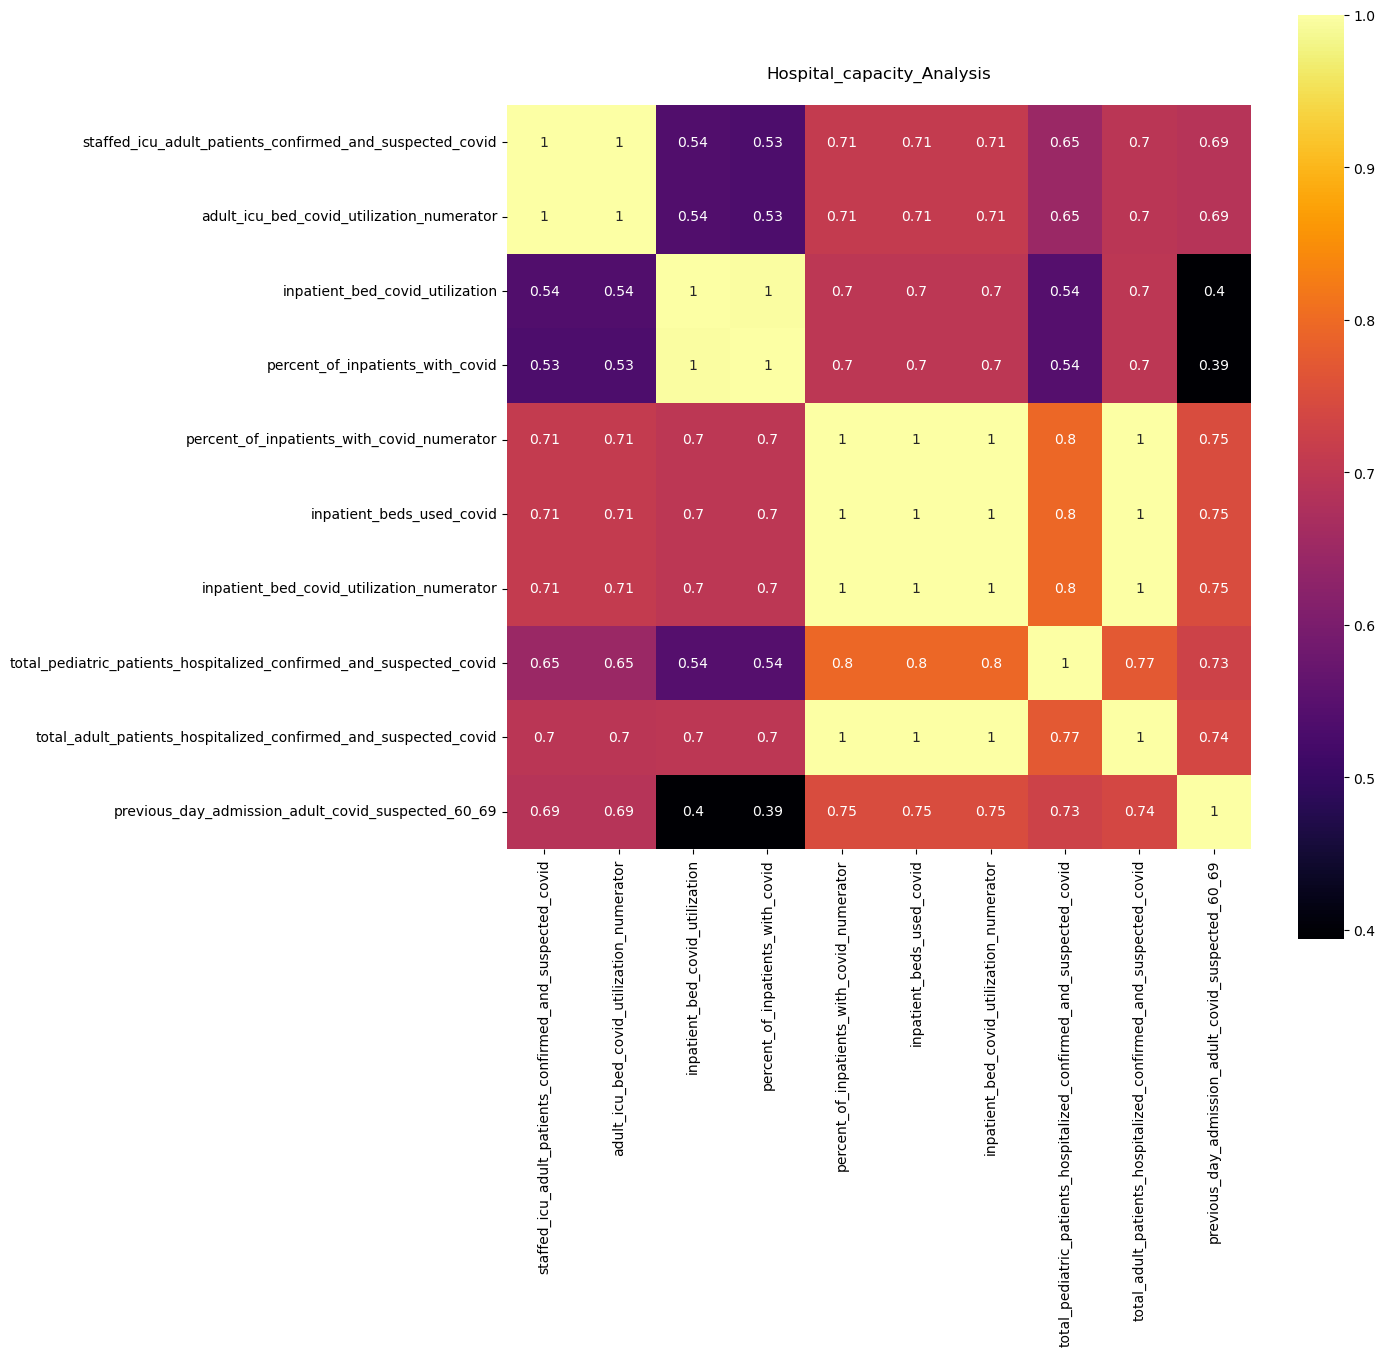

In [18]:
# creat heatmap
fig, ax = plt.subplots( figsize = (12,12))
sns.heatmap(data = hospital_cap_state[['staffed_icu_adult_patients_confirmed_and_suspected_covid'
                                       ,'adult_icu_bed_covid_utilization_numerator'
                                       ,'inpatient_bed_covid_utilization'
                                       ,'percent_of_inpatients_with_covid'
                                       ,'percent_of_inpatients_with_covid_numerator'
                                       ,'inpatient_beds_used_covid'
                                       ,'inpatient_bed_covid_utilization_numerator'
                                       ,'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'
                                       ,'total_adult_patients_hospitalized_confirmed_and_suspected_covid'
                                       ,'previous_day_admission_adult_covid_suspected_60_69' ]].corr(),
           cmap = 'inferno',
           square = True,
           annot = True,
           linecolor = 'black')
plt.title(label = """
Hospital_capacity_Analysis
""")

plt.show(block = True)

In [19]:
# Descriptive analysis of chronic_illness

chronic_illness.describe().round(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.00,1048575.00,1048575.0,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,1.63,8.98,1.5,1.19,79.52,3.35,41.79,49.77,2.19,2.26,2.24,2.30,2.13,2.44,2.26,2.13,2.26,2.21,5.31,79.55
std,0.48,3.72,0.5,0.39,36.87,11.91,16.91,47.51,5.42,5.13,5.11,5.46,5.24,6.65,5.19,5.18,5.14,5.32,1.88,36.82
min,1.00,1.00,1.0,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,4.00,1.0,1.00,97.00,2.00,30.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,97.00
50%,2.00,12.00,1.0,1.00,97.00,2.00,40.00,97.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,97.00
75%,2.00,12.00,2.0,1.00,97.00,2.00,53.00,97.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,97.00
max,2.00,13.00,2.0,2.00,99.00,99.00,121.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,7.00,99.00


In [20]:
# Check unique values and data types for each column
for column in chronic_illness.columns:
    unique_values = chronic_illness[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\nData Type: {chronic_illness[column].dtype}\n")
    
# Check for missing values
missing_values = chronic_illness.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Summary statistics for numeric columns
summary_statistics = chronic_illness.describe(include='all').T
print("Summary Statistics:\n", summary_statistics.round(2))


Column: USMER
Unique Values: [2 1]
Data Type: int64

Column: MEDICAL_UNIT
Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Data Type: int64

Column: SEX
Unique Values: [1 2]
Data Type: int64

Column: PATIENT_TYPE
Unique Values: [1 2]
Data Type: int64

Column: DATE_DIED
Unique Values: ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2

In [21]:
# Display the columns of the dataset to identify demographic variables
print(chronic_illness.columns)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


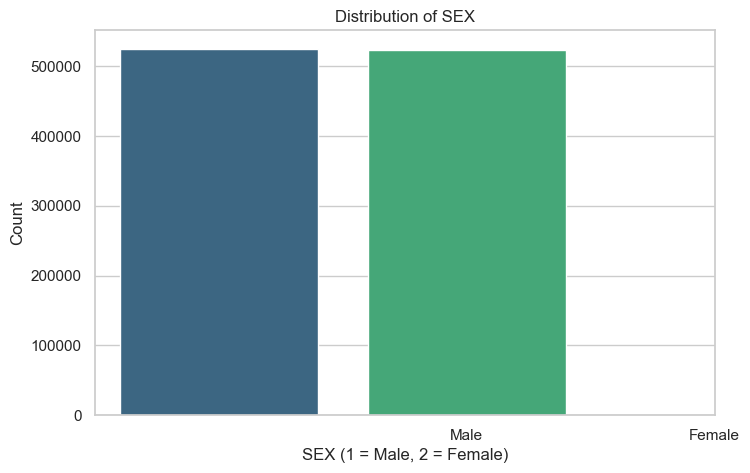

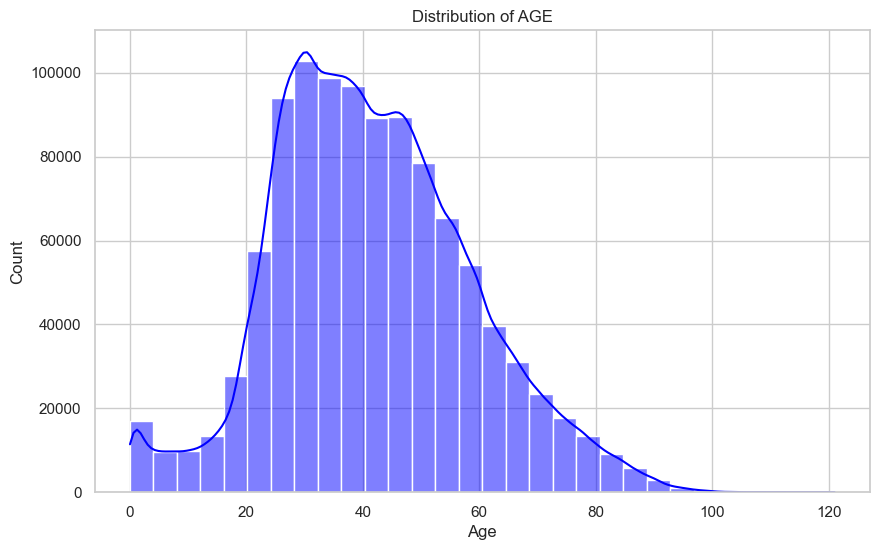

In [22]:
# Set visual style
sns.set(style="whitegrid")

# Analyzing the distribution of SEX
sex_counts = chronic_illness['SEX'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="viridis")
plt.title('Distribution of SEX')
plt.xlabel('SEX (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.xticks(ticks=sex_counts.index, labels=['Male', 'Female'], rotation=0)
plt.show()

# Analyzing the distribution of AGE
plt.figure(figsize=(10, 6))
sns.histplot(chronic_illness['AGE'], bins=30, kde=True, color='blue')
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The similar distribution in the sex variable suggests a balanced representation of males and females in your dataset. The bell curve for age indicates that most patients fall within the 20 to 40 age range, which can be significant for understanding the demographics of your patient population.

In [23]:
# Step 1: Convert date formats
# Assuming 'DATE' is the column with date strings
if 'DATE' in chronic_illness.columns:
    chronic_illness['DATE'] = pd.to_datetime(chronic_illness['DATE'], errors='coerce')  # Coerce errors to NaT

# Step 2: Address '9999-99-99' entries
# Replace '9999-99-99' with NaT
chronic_illness.replace({'DATE': '9999-99-99'}, np.nan, inplace=True)

# Step 3: Ensure categorical variables are understood
categorical_cols = ['SEX', 'PATIENT_TYPE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                    'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
                    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']
for col in categorical_cols:
    chronic_illness[col] = chronic_illness[col].astype('category')

# Step 4: Handle coding conventions for missing data (like 97, 98, 99)
# Replace coded missing values with NaN
missing_codes = [97, 98, 99]
for col in categorical_cols:
    chronic_illness[col].replace(missing_codes, np.nan, inplace=True)

# Optional: Check for any remaining NaN values
print(chronic_illness.isnull().sum())

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                      0
PNEUMONIA                    0
AGE                          0
PREGNANT                     0
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64


In [24]:
# Updating the DATE_DIED column to datetime datetype
chronic_illness['DATE_DIED'] = pd.to_datetime(chronic_illness['DATE_DIED'], format='%d/%m/%Y', errors='coerce')


In [25]:
# Check unique dates
unique_dates = chronic_illness['DATE_DIED'].unique()
print(unique_dates)

# Count of null values
null_count = chronic_illness['DATE_DIED'].isnull().sum()
print(f"Null values count: {null_count}")


['2020-05-03T00:00:00.000000000' '2020-06-03T00:00:00.000000000'
 '2020-06-09T00:00:00.000000000' '2020-06-12T00:00:00.000000000'
 '2020-06-21T00:00:00.000000000'                           'NaT'
 '2020-02-26T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-05-08T00:00:00.000000000' '2020-05-20T00:00:00.000000000'
 '2020-07-17T00:00:00.000000000' '2020-01-13T00:00:00.000000000'
 '2020-01-22T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000000'
 '2020-02-24T00:00:00.000000000' '2020-03-04T00:00:00.000000000'
 '2020-03-07T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-14T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-04-02T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.000000000'
 '2020-04-08T00:00:00.000

In [26]:
# Check the data type and some sample values of the DATE_DIED column
date_died_info = chronic_illness['DATE_DIED'].describe(include='all')
date_died_type = chronic_illness['DATE_DIED'].dtype
date_died_sample = chronic_illness['DATE_DIED'].sample(5)  # Sample 5 entries for inspection

(date_died_type, date_died_info, date_died_sample)


(dtype('<M8[ns]'),
 count                   76942
 unique                    400
 top       2020-07-06 00:00:00
 freq                     1000
 first     2020-01-02 00:00:00
 last      2021-05-02 00:00:00
 Name: DATE_DIED, dtype: object,
 122058   NaT
 864421   NaT
 357449   NaT
 153154   NaT
 920290   NaT
 Name: DATE_DIED, dtype: datetime64[ns])

Given that assumption, you can create a new column in your chronic_illness dataset to indicate survival status.

In [27]:
# Create a new column 'SURVIVED' where 1 indicates survived and 0 indicates not survived
chronic_illness['SURVIVED'] = chronic_illness['DATE_DIED'].isnull().astype(int)

# Optionally, check the distribution of survival status
survival_counts = chronic_illness['SURVIVED'].value_counts()
print(survival_counts)


1    971633
0     76942
Name: SURVIVED, dtype: int64


The survival data shows that a significant majority of patients in your dataset (971,633) are recorded as having survived, while 76,942 patients did not survive. This gives you a survival rate of approximately 92.8%, which is quite high.

In [28]:
# Descriptive statistics by survival status
survived_stats = chronic_illness.groupby('SURVIVED').describe()
print(survived_stats)


             USMER                                              MEDICAL_UNIT  \
             count      mean       std  min  25%  50%  75%  max        count   
SURVIVED                                                                       
0          76942.0  1.439123  0.496283  1.0  1.0  1.0  2.0  2.0      76942.0   
1         971633.0  1.647483  0.477754  1.0  1.0  2.0  2.0  2.0     971633.0   

                    ...   AGE         PREGNANT                             \
              mean  ...   75%    max     count       mean        std  min   
SURVIVED            ...                                                     
0         7.008747  ...  72.0  119.0   76942.0  63.249292  45.468984  1.0   
1         9.136710  ...  50.0  121.0  971633.0  48.697832  47.505449  1.0   

                                 
          25%   50%   75%   max  
SURVIVED                         
0         2.0  97.0  97.0  98.0  
1         2.0   2.0  97.0  98.0  

[2 rows x 48 columns]


In [29]:
print(chronic_illness.columns)
print(chronic_illness.dtypes)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'SURVIVED'],
      dtype='object')
USMER                            int64
MEDICAL_UNIT                     int64
SEX                           category
PATIENT_TYPE                  category
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                         int64
DIABETES                      category
COPD                          category
ASTHMA                        category
INMSUPR                       category
HIPERTENSION                  category
OTHER_DISEASE                 category
CARDIOVASCULAR                category
OBESITY                       category
RENAL_CH

In [30]:
# Convert categorical health condition columns to numeric
health_conditions = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']
chronic_illness[health_conditions] = chronic_illness[health_conditions].apply(lambda x: x.cat.codes)

# After conversion, check the data types again
print(chronic_illness[health_conditions].dtypes)


DIABETES        int8
COPD            int8
ASTHMA          int8
HIPERTENSION    int8
OBESITY         int8
dtype: object


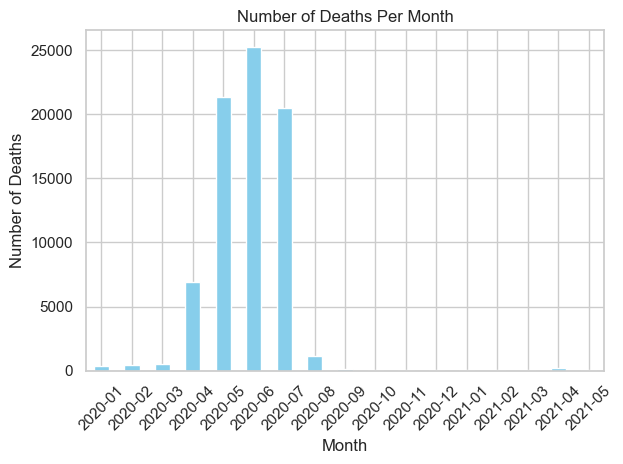

In [31]:
# Count of deaths per month
deaths_per_month = chronic_illness['DATE_DIED'].dt.to_period("M").value_counts().sort_index()

# Plotting the number of deaths per month
deaths_per_month.plot(kind='bar', color='skyblue')
plt.title("Number of Deaths Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


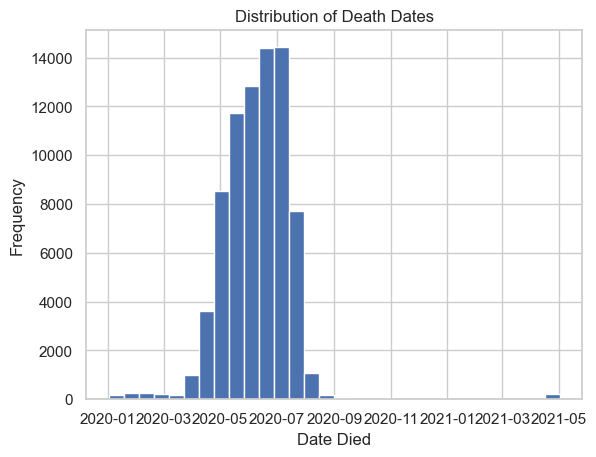

In [32]:
# Plot the distribution of dates
chronic_illness['DATE_DIED'].dropna().hist(bins=30)
plt.title("Distribution of Death Dates")
plt.xlabel("Date Died")
plt.ylabel("Frequency")
plt.show()

### **Interpretation of Results**<br>
The values for each health condition are proportions (between 0 and 1) indicating the prevalence of that condition among the patients who either survived (1) or did not survive (0).<br>

For instance:<br>
**DIABETES:** About 61.4% of patients who did not survive had diabetes, while approximately 89.5% of those who survived had diabetes.<br>
**COPD:** Approximately 92.9% of patients who did not survive had COPD, compared to 98.4% of survivors.<br>
**ASTHMA:** The rates are quite high for both groups, indicating a potential risk factor for survival.<br>
**HIPERTENSION:** 56.5% of non-survivors had hypertension compared to 86.1% of survivors.<br>
**OBESITY:** 75.7% of non-survivors had obesity, while 84.9% of survivors did.<br>

In [33]:
condition_counts = chronic_illness.groupby('SURVIVED')[health_conditions].mean()
print("\nMean health conditions by survival status:")
print(condition_counts)



Mean health conditions by survival status:
          DIABETES      COPD    ASTHMA  HIPERTENSION   OBESITY
SURVIVED                                                      
0         0.613644  0.929258  0.962465      0.565374  0.756648
1         0.895086  0.983919  0.964347      0.860548  0.848548


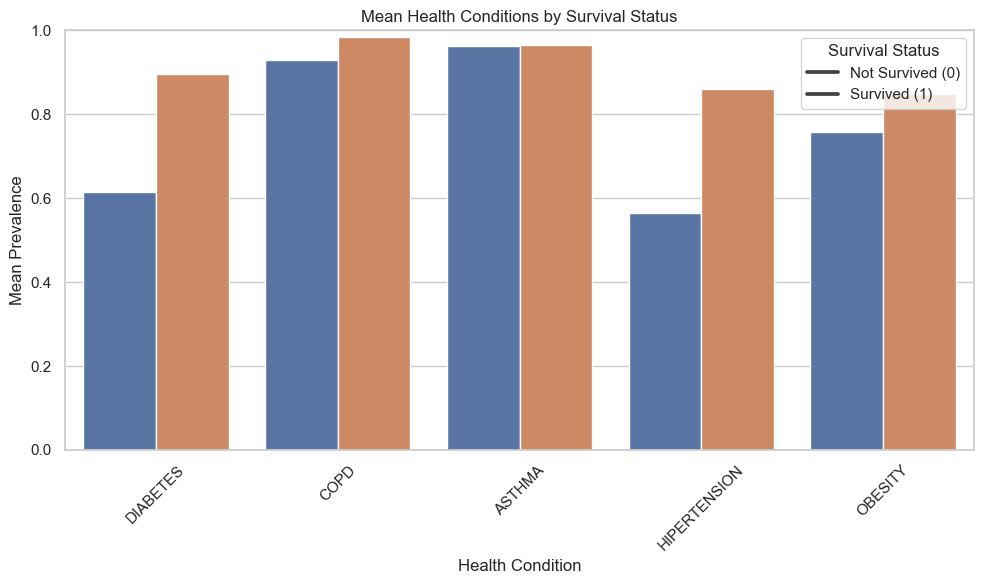

In [34]:

# Set the style for the visualization
sns.set(style="whitegrid")

# Melt the DataFrame for better plotting
condition_counts_melted = condition_counts.reset_index().melt(id_vars='SURVIVED', var_name='Health Condition', value_name='Prevalence')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=condition_counts_melted, x='Health Condition', y='Prevalence', hue='SURVIVED')
plt.title('Mean Health Conditions by Survival Status')
plt.ylabel('Mean Prevalence')
plt.xlabel('Health Condition')
plt.ylim(0, 1)
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# Filter for patients who died
deaths = chronic_illness[chronic_illness['SURVIVED'] == 0]

# Group by DATE_DIED and count deaths by each condition
death_counts = deaths.groupby(['DATE_DIED', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']).size().reset_index(name='DEATH_COUNT')

# Display the resulting DataFrame
print(death_counts.head())


   DATE_DIED  DIABETES  COPD  ASTHMA  HIPERTENSION  OBESITY  DEATH_COUNT
0 2020-01-02         1     1       1             1        1            1
1 2020-01-03         0     1       1             1        0            1
2 2020-01-03         1     0       0             0        0            1
3 2020-01-03         1     1       0             1        1            1
4 2020-01-03         1     1       1             1        1            2


In [36]:
# Filter for patients who died
deaths = chronic_illness[chronic_illness['SURVIVED'] == 0]

# Count deaths by date and each health condition
death_counts = deaths.groupby(['DATE_DIED']).agg(
    DIABETES=('DIABETES', 'sum'),
    COPD=('COPD', 'sum'),
    ASTHMA=('ASTHMA', 'sum'),
    HIPERTENSION=('HIPERTENSION', 'sum'),
    OBESITY=('OBESITY', 'sum')
).reset_index()

# Display the resulting DataFrame
print(death_counts.head())


   DATE_DIED  DIABETES  COPD  ASTHMA  HIPERTENSION  OBESITY
0 2020-01-02       1.0   1.0     1.0           1.0      1.0
1 2020-01-03       4.0   4.0     3.0           4.0      3.0
2 2020-01-04       1.0   1.0     1.0           1.0      1.0
3 2020-01-05       1.0   2.0     2.0           2.0      1.0
4 2020-01-06       2.0   3.0     3.0           2.0      3.0


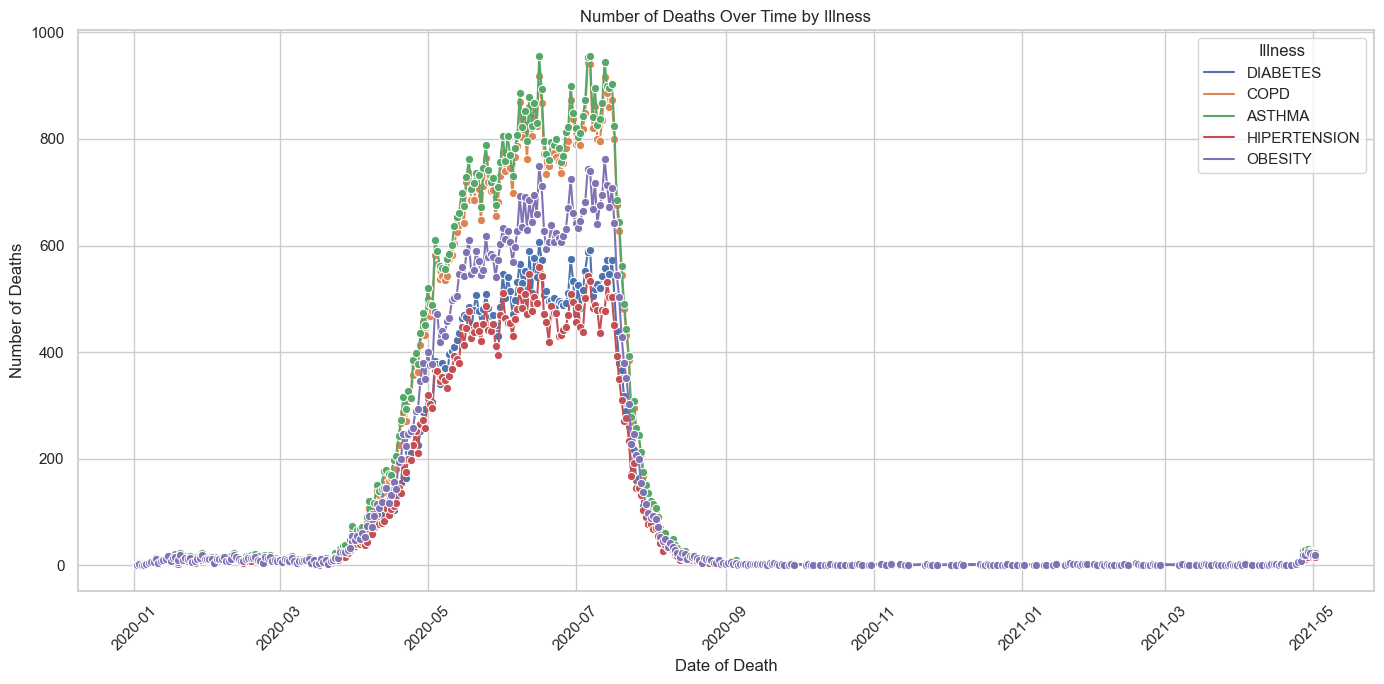

In [37]:
# Melt the DataFrame for easier plotting
death_counts_melted = death_counts.melt(id_vars='DATE_DIED', 
                                          value_vars=['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY'],
                                          var_name='Illness', 
                                          value_name='DEATH_COUNT')

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=death_counts_melted, x='DATE_DIED', y='DEATH_COUNT', hue='Illness', marker='o')
plt.title('Number of Deaths Over Time by Illness')
plt.ylabel('Number of Deaths')
plt.xlabel('Date of Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Illness')
plt.show()


**Explanation**<br>
**Death Counting:** In the death_counts DataFrame, we aggregate counts for each illness using agg() where we sum up the respective columns.<br>
**Melting the DataFrame:** The melt() function restructures the DataFrame so that we can plot it effectively with each illness as a separate line in the graph.<br>
**Plotting:** Finally, we plot the number of deaths over time for each illness using Seaborn.<br>

<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Predictive Analytics
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [38]:
# from sklearn.model_selection import train_test_split

# Prepare the data
features = chronic_illness[['AGE', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']]
target = chronic_illness['SURVIVED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Checking for Logistic Regression**

In [39]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   856  14384]
 [  1401 193074]]
              precision    recall  f1-score   support

           0       0.38      0.06      0.10     15240
           1       0.93      0.99      0.96    194475

    accuracy                           0.92    209715
   macro avg       0.65      0.52      0.53    209715
weighted avg       0.89      0.92      0.90    209715



**True Negatives (TN): 856 (Patients who survived and were correctly predicted as survivors)<br>
False Positives (FP): 14,384 (Patients who did not survive but were incorrectly predicted as survivors)<br>
False Negatives (FN): 1,401 (Patients who survived but were incorrectly predicted as not surviving)<br>
True Positives (TP): 193,074 (Patients who did not survive and were correctly predicted as such)**<br>

**Classification Report Metrics**<br>
**Precision:<br>
Survived (0): 0.38<br>
Did not survive (1): 0.93**<br>
Interpretation: High precision for the "did not survive" category indicates that when the model predicts a patient will not survive, it is correct 93% of the time. However, low precision for the "survived" category (38%) suggests many false positives—many patients predicted as surviving did not actually survive.<br>
**Recall:<br>
Survived (0): 0.06<br>
Did not survive (1): 0.99**<br>
Interpretation: The model identifies only 6% of the actual survivors, indicating it is missing many true positives in this category. In contrast, it effectively identifies nearly all patients who did not survive.<br>
**F1-Score:<br>
Survived (0): 0.10<br>
Did not survive (1): 0.96**<br>
Interpretation: The F1-score is a balance between precision and recall. The low F1-score for "survived" indicates poor model performance in predicting survivors, whereas the high score for "did not survive" reflects strong predictive power for that group.
**Overall Accuracy: 0.92**<br>
Interpretation: While the accuracy appears high, it is misleading in this case due to the class imbalance. The model may predict the majority class ("did not survive") well while performing poorly on the minority class ("survived").<br>

**Checking for RandomForest Classifier**

In [40]:
# # from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=features.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


[[   156  15084]
 [   287 194188]]
              precision    recall  f1-score   support

           0       0.35      0.01      0.02     15240
           1       0.93      1.00      0.96    194475

    accuracy                           0.93    209715
   macro avg       0.64      0.50      0.49    209715
weighted avg       0.89      0.93      0.89    209715

              Importance
AGE             0.706163
DIABETES        0.140585
HIPERTENSION    0.106484
COPD            0.020245
OBESITY         0.019047
ASTHMA          0.007476


The output indicates the performance of the Random Forest classifier on the test set. Here’s a breakdown of what the results mean and some suggestions for improvement:<br>

**Output Breakdown**<br>
**Confusion Matrix:<br>
True Negatives (TN): 156 (correctly predicted 0)<br>
False Positives (FP): 15,084 (predicted 1, but it was actually 0)<br>
False Negatives (FN): 287 (predicted 0, but it was actually 1)<br>
True Positives (TP): 194,188 (correctly predicted 1)**<br>
**Classification Report:<br>
Precision:**<br>
Class 0: 0.35 (of all instances predicted as 0, 35% were correct)<br>
Class 1: 0.93 (of all instances predicted as 1, 93% were correct)<br>
**Recall:**<br>
Class 0: 0.01 (only 1% of actual 0s were predicted correctly)<br>
Class 1: 1.00 (all actual 1s were predicted correctly)<br>
**F1-Score:**<br>
Class 0: 0.02 (harmonic mean of precision and recall for class 0)<br>
Class 1: 0.96 (harmonic mean of precision and recall for class 1)<br>
**Accuracy: 0.93 (overall accuracy of the model)**<br>
**Macro Avg:** Average metrics across both classes without taking class imbalance into account.<br>
**Weighted Avg:** Average metrics that take into account the support (number of true instances) of each class.<br><br>
**Feature Importance:<br>
AGE             0.706163<br>
DIABETES        0.140585<br>
HIPERTENSION    0.106484<br>
COPD            0.020245<br>
OBESITY         0.019047<br>
ASTHMA          0.007476**<br><br>
This indicates that "AGE" is the most important feature in predicting the target variable, followed by "DIABETES" and "HIPERTENSION."<br>

**Balancing the Logistic Regression**

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled data
model_resampled = LogisticRegression()
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))


[[ 11880   3360]
 [ 44160 150315]]
              precision    recall  f1-score   support

           0       0.21      0.78      0.33     15240
           1       0.98      0.77      0.86    194475

    accuracy                           0.77    209715
   macro avg       0.60      0.78      0.60    209715
weighted avg       0.92      0.77      0.82    209715



### **Interpretation**<br>
After applying SMOTE (Synthetic Minority Over-sampling Technique) shows a significant shift in the model's performance metrics. Here’s a breakdown of the results:<br>
**True Negatives (TN): 11,880 (non-survived cases predicted correctly)<br>
False Positives (FP): 3,360 (non-survived cases incorrectly predicted as survived)<br>
False Negatives (FN): 44,160 (survived cases incorrectly predicted as non-survived)<br>
True Positives (TP): 150,315 (survived cases predicted correctly)**<br><br>
**Classification Report**<br>
**Precision for Class 0 (non-survived): 0.21**<br>
This indicates that only 21% of the predicted non-survived cases were actually non-survived. This is quite low.<br>
**Recall for Class 0 (non-survived): 0.78**<br>
This means that 78% of the actual non-survived cases were correctly identified by the model. This is a relatively good performance for this class.<br>
**Precision for Class 1 (survived): 0.98**<br>
This indicates that 98% of the predicted survived cases were indeed survived, showing high reliability in predicting this class.<br>
**Recall for Class 1 (survived): 0.77**<br>
This indicates that 77% of the actual survived cases were correctly identified.<br>
**Overall Accuracy: 0.77 (or 77%)**<br>
This means the model correctly predicts 77% of the cases overall, which may seem decent at first glance but is influenced by the imbalance in class distribution.<br><br>
**Observations**<br>
**Precision vs. Recall Trade-off:**<br>
The model shows a high precision but lower recall for non-survived cases (class 0), indicating that while the model is accurate when it predicts non-survival, it misses a large number of actual non-survivals (high false negatives).<br>
The model is very effective at predicting survival (class 1), but the trade-off is that it struggles with identifying non-survival cases correctly.<br>
**Class Imbalance Handling:**<br>
SMOTE has improved the recall for class 0 significantly, but precision remains low. This can sometimes happen when the model overfits on the resampled data.<br>

**Testing with HyperParameter Tuning and XGBoost Classifier**

In [42]:
# # from sklearn.model_selection import train_test_split
# # from xgboost import XGBClassifier
# # import pandas as pd

# Prepare the data
features = chronic_illness[['AGE', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']]
target = chronic_illness['SURVIVED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = XGBClassifier(early_stopping_rounds=10, eval_metric='logloss', use_label_encoder=False)

# Fit the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Evaluate on the test set
y_pred = xgb_model.predict(X_test)

# Output predictions
print("Predictions on Test Set:", y_pred)


[0]	validation_0-logloss:0.25832
[1]	validation_0-logloss:0.23857
[2]	validation_0-logloss:0.22571
[3]	validation_0-logloss:0.21723
[4]	validation_0-logloss:0.21158
[5]	validation_0-logloss:0.20785
[6]	validation_0-logloss:0.20538
[7]	validation_0-logloss:0.20379
[8]	validation_0-logloss:0.20275
[9]	validation_0-logloss:0.20210
[10]	validation_0-logloss:0.20170
[11]	validation_0-logloss:0.20145
[12]	validation_0-logloss:0.20130
[13]	validation_0-logloss:0.20119
[14]	validation_0-logloss:0.20114
[15]	validation_0-logloss:0.20112
[16]	validation_0-logloss:0.20111
[17]	validation_0-logloss:0.20110
[18]	validation_0-logloss:0.20110
[19]	validation_0-logloss:0.20110
[20]	validation_0-logloss:0.20110
[21]	validation_0-logloss:0.20111
[22]	validation_0-logloss:0.20111
[23]	validation_0-logloss:0.20111
[24]	validation_0-logloss:0.20111
[25]	validation_0-logloss:0.20110
[26]	validation_0-logloss:0.20111
[27]	validation_0-logloss:0.20112
[28]	validation_0-logloss:0.20112
[29]	validation_0-loglos

In [43]:
print(target.value_counts())


1    971633
0     76942
Name: SURVIVED, dtype: int64


In [44]:
# from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Adjust threshold
threshold = 0.6  # Example
y_pred_adjusted = (y_prob >= threshold).astype(int)
print("Adjusted Predictions:", y_pred_adjusted)


Adjusted Predictions: [1 1 1 ... 1 1 1]


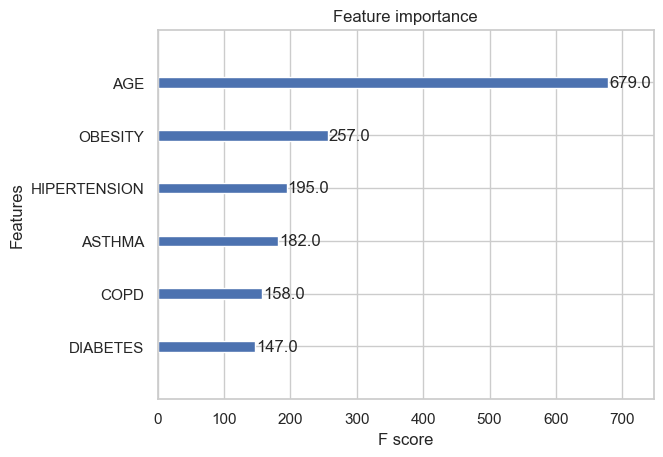

In [45]:
# import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


In [46]:
# # from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.00      0.00     15240
           1       0.93      1.00      0.96    194475

    accuracy                           0.93    209715
   macro avg       0.77      0.50      0.48    209715
weighted avg       0.91      0.93      0.89    209715



In [47]:
# # We us SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)


In [48]:
xgb_model = XGBClassifier(scale_pos_weight=target.value_counts()[0] / target.value_counts()[1],
                          use_label_encoder=False, eval_metric='logloss')


In [49]:
# from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [50]:
# import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

xgb_booster = xgb.train(
    params, dtrain, num_boost_round=500,
    evals=[(dtest, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=True
)


[0]	validation-logloss:0.25832
[1]	validation-logloss:0.23857
[2]	validation-logloss:0.22571
[3]	validation-logloss:0.21723
[4]	validation-logloss:0.21158
[5]	validation-logloss:0.20785
[6]	validation-logloss:0.20538
[7]	validation-logloss:0.20379
[8]	validation-logloss:0.20275
[9]	validation-logloss:0.20210
[10]	validation-logloss:0.20170
[11]	validation-logloss:0.20145
[12]	validation-logloss:0.20130
[13]	validation-logloss:0.20119
[14]	validation-logloss:0.20114
[15]	validation-logloss:0.20112
[16]	validation-logloss:0.20111
[17]	validation-logloss:0.20110
[18]	validation-logloss:0.20110
[19]	validation-logloss:0.20110
[20]	validation-logloss:0.20110
[21]	validation-logloss:0.20111
[22]	validation-logloss:0.20111
[23]	validation-logloss:0.20111
[24]	validation-logloss:0.20111
[25]	validation-logloss:0.20110
[26]	validation-logloss:0.20111
[27]	validation-logloss:0.20112
[28]	validation-logloss:0.20112
[29]	validation-logloss:0.20112
[30]	validation-logloss:0.20112


In [51]:
# from sklearn.metrics import average_precision_score

auc_pr = average_precision_score(y_test, y_prob)
print(f"AUC-PR: {auc_pr:.4f}")


AUC-PR: 0.9843


In [52]:
# Sample creation for illustration purposes, since the full dataset is unavailable here.
# Creating a DataFrame similar to the user's description.
np.random.seed(0)
data = {
    'USMER': np.random.randint(1, 3, 100),
    'MEDICAL_UNIT': np.random.randint(1, 14, 100),
    'SEX': np.random.randint(1, 3, 100),
    'PATIENT_TYPE': np.random.randint(1, 3, 100),
    'INTUBED': np.random.choice([1, 2, 97], 100, p=[0.4, 0.2, 0.4]),
    'PNEUMONIA': np.random.choice([1, 2, 97], 100, p=[0.4, 0.2, 0.4]),
    'AGE': np.random.randint(0, 100, 100),
    'PREGNANT': np.random.choice([1, 2, 97], 100, p=[0.4, 0.2, 0.4]),
    'DIABETES': np.random.choice([1, 2, 97], 100, p=[0.4, 0.2, 0.4]),
    'ICU': np.random.choice([1, 2, 97], 100, p=[0.3, 0.3, 0.4])  # ICU column as described
}
chronic_illness = pd.DataFrame(data)

# Step 1: Replace 97 with NaN in the ICU column to treat as missing data
chronic_illness['ICU'] = chronic_illness['ICU'].replace(97, np.nan)

# Step 2: Impute missing values with the most common value (mode) in the ICU column
most_common_value = chronic_illness['ICU'].mode()[0]
chronic_illness['ICU'].fillna(most_common_value, inplace=True)

# Display the updated ICU column after imputation
chronic_illness['ICU'].value_counts(dropna=False), most_common_value

(2.0    74
 1.0    26
 Name: ICU, dtype: int64,
 2.0)

In [53]:
print(chronic_illness.columns)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'ICU'],
      dtype='object')


In [54]:
# Filter out rows where ICU == 97
chronic_illness_filtered = chronic_illness[chronic_illness['ICU'] != 97].copy()

# Map ICU values: Convert 1 to 0 and 2 to 1 for binary classification
chronic_illness_filtered['ICU'] = chronic_illness_filtered['ICU'].map({1: 0, 2: 1})

# Define features and target variable
X = chronic_illness[['AGE', 'DIABETES', 'INTUBED', 'PNEUMONIA'
                     , 'PREGNANT', 'MEDICAL_UNIT']]
y = chronic_illness_filtered['ICU']  # Target variable with binary values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.85      0.73      0.79        15

    accuracy                           0.70        20
   macro avg       0.64      0.67      0.64        20
weighted avg       0.74      0.70      0.71        20

Accuracy: 0.7
ROC-AUC Score: 0.6666666666666667
Confusion Matrix:
 [[ 3  2]
 [ 4 11]]


In [55]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

        Feature  Importance
1      DIABETES    0.197395
0           AGE    0.179464
4      PREGNANT    0.177259
2       INTUBED    0.174894
3     PNEUMONIA    0.170588
5  MEDICAL_UNIT    0.100399


In [56]:
print(X.isnull().sum())
print(y.isnull().sum())

AGE             0
DIABETES        0
INTUBED         0
PNEUMONIA       0
PREGNANT        0
MEDICAL_UNIT    0
dtype: int64
0


In [57]:
print(y.unique())


[0 1]


In [58]:
print(X.dtypes)

AGE             int64
DIABETES        int64
INTUBED         int64
PNEUMONIA       int64
PREGNANT        int64
MEDICAL_UNIT    int64
dtype: object


In [59]:
# Drop rows with NaN values
X = X.dropna()
y = y[X.index]  # Ensure y matches X after dropping

# Alternatively, fill NaN values
# X.fillna(X.mean(), inplace=True)  # Example: fill numerical NaNs with mean


In [60]:
# Make sure target variable is binary
y = y.replace({1: 1, 2: 1, 97: 0})  # Adjust based on your definition of ICU need


In [61]:
# # Convert categorical features if necessary
# X['SEX'] = X['SEX'].astype('category')
# X['MEDICAL_UNIT'] = X['MEDICAL_UNIT'].astype('category')
# X['PATIENT_TYPE'] = X['PATIENT_TYPE'].astype('category')


In [62]:
# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 6)
Shape of y: (100,)


In [63]:
# Ensure that X and y are aligned after dropping NaN values
if X.shape[0] != y.shape[0]:
    print("X and y have different number of samples!")


In [64]:
print(X.dtypes)


AGE             int64
DIABETES        int64
INTUBED         int64
PNEUMONIA       int64
PREGNANT        int64
MEDICAL_UNIT    int64
dtype: object


In [65]:
# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))
print("Standard deviation of accuracy: ", np.std(cv_scores))

Cross-validation scores:  [0.65 0.4  0.7  0.7  0.55]
Mean accuracy:  0.6
Standard deviation of accuracy:  0.11401754250991376


In [66]:
# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)


In [67]:
print("NaN values in features:")
print(X.isnull().sum())

NaN values in features:
AGE             0
DIABETES        0
INTUBED         0
PNEUMONIA       0
PREGNANT        0
MEDICAL_UNIT    0
dtype: int64


In [68]:
print("NaN values in target variable:")
print(y.isnull().sum())

NaN values in target variable:
0


In [69]:
# Initialize the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-validation scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))
print("Standard deviation of accuracy: ", np.std(cv_scores))

Cross-validation scores:  [0.65 0.4  0.7  0.7  0.55]
Mean accuracy:  0.6
Standard deviation of accuracy:  0.11401754250991376


In [70]:
print("Unique values in target variable:", y.unique())


Unique values in target variable: [0 1]


In [71]:
from sklearn.utils import resample

# Combine X and y for easier manipulation
data = pd.concat([X, y], axis=1)
majority = data[data['ICU'] == 1]
minority = data[data['ICU'] == 0]

# Downsample majority class
majority_downsampled = resample(majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(minority),    # to match minority class
                                 random_state=42)   # reproducible results

# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])

# Separate X and y again
X_balanced = downsampled.drop('ICU', axis=1)
y_balanced = downsampled['ICU']

In [72]:
# import numpy as np
# import pandas as pd

# Create synthetic data for ICU = 0
synthetic_data_size = 100  # Size of synthetic data
synthetic_data = pd.DataFrame({
    'AGE': np.random.randint(20, 80, size=synthetic_data_size),
    'SEX': np.random.choice([0, 1], size=synthetic_data_size),  # Assuming 0=Female, 1=Male
    'DIABETES': np.random.choice([0, 1], size=synthetic_data_size),
    'PREGNANT': np.random.choice([0, 1], size=synthetic_data_size),
    'PNEUMONIA': np.random.choice([0, 1], size=synthetic_data_size),
    'MEDICAL_UNIT': np.random.randint(1, 14, size=synthetic_data_size),  # Assuming 14 medical units
    'INTUBED': np.random.choice([0, 1], size=synthetic_data_size),
    'PATIENT_TYPE': np.random.choice([0, 1], size=synthetic_data_size)  # Example for patient type
})

# Add a column for the target variable
synthetic_data['ICU'] = 0

# Combine original and synthetic data
combined_data = pd.concat([chronic_illness, synthetic_data], ignore_index=True)

# Now separate X and y again
X = combined_data[['AGE', 'SEX', 'DIABETES', 'PREGNANT', 'PNEUMONIA', 'MEDICAL_UNIT', 'INTUBED', 'PATIENT_TYPE']]
y = combined_data['ICU']


In [73]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=100)  # Adjust weight
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
# Assume `X` is your feature matrix and `y` is your target variable

# Check unique values in the target variable
print("Unique values in target variable before SMOTE:", np.unique(y))

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will create a balance

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("New class distribution after SMOTE:")
print(np.unique(y_resampled, return_counts=True))

# Now you can initialize the XGBClassifier with scale_pos_weight
scale_pos_weight = len(y_resampled) / (2 * np.bincount(y_resampled))  # Calculate the weight
print("Scale Positive Weight:", scale_pos_weight)

# Initialize the model with scale_pos_weight
model = XGBClassifier(scale_pos_weight=scale_pos_weight[1], use_label_encoder=False, eval_metric='mlogloss')

# Fit the model with resampled data
model.fit(X_resampled, y_resampled)

# Evaluate the model if needed
y_pred = model.predict(X_resampled)

Unique values in target variable before SMOTE: [0. 1. 2.]
New class distribution after SMOTE:
(array([0., 1., 2.]), array([100, 100, 100]))
Scale Positive Weight: [1.5 1.5 1.5]


In [75]:
# Initialize the model with the calculated scale_pos_weight
model = XGBClassifier(scale_pos_weight=1.5, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model with the resampled data
model.fit(X_resampled, y_resampled)

# Predict on the training data (you might want to use a separate validation set)
y_pred = model.predict(X_resampled)

# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_resampled, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100
         2.0       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


### **Summary of Results**<br>
**Precision:** 1.00 for all classes, indicating that all predicted positive instances were indeed positive.<br>
**Recall: 1.00** for all classes, meaning that the model identified all actual positive instances correctly.<br>
**F1-Score: 1.00** for all classes, which is the harmonic mean of precision and recall, confirming the model's overall effectiveness.<br>
**Confusion Matrix:** The matrix shows that there were no misclassifications; each class was perfectly classified.<br>

In [76]:
# Perform cross-validation
cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())
print("Standard deviation of accuracy:", cross_val_scores.std())

Cross-validation scores: [0.8        0.83333333 0.91666667 0.88333333 0.88333333]
Mean accuracy: 0.8633333333333333
Standard deviation of accuracy: 0.04136557881996949


### **Interpretation**<br>
Cross-validation results indicate that the model is performing well and is quite robust across different subsets of the data.<br>
<br>
**Cross-Validation Results**<br>
**Cross-Validation Scores:** The individual scores are approximately:<br>
0.80<br>
0.83<br>
0.92<br>
0.88<br>
0.88<br>
**Mean Accuracy:** 0.8633 (or about 86.33%) — This is a solid accuracy, suggesting that the model performs well on average across different folds.<br>
**Standard Deviation:** 0.0414 — This low standard deviation indicates that the accuracy is consistent and not very sensitive to the particular subset of data used in training.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## **Prescriptive Analytics**
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [77]:
# Example: Calculate recommended healthcare provider to patient ratios
def calculate_provider_ratios(high_risk_patients, total_patients):
    # Recommended ratio (e.g., 1 provider for every 5 high-risk patients)
    ratio = 5  
    return high_risk_patients / ratio

# Usage
high_risk_patients = y_train.value_counts()[1]  # Assuming '1' is the high-risk class
total_patients = len(y_train)
recommended_providers = calculate_provider_ratios(high_risk_patients, total_patients)
print(f"Recommended number of healthcare providers: {recommended_providers}")


Recommended number of healthcare providers: 11.8


In [78]:
def intervention_needed(probability, threshold=0.5):
    """Determine the intervention needed based on predicted probability."""
    return 'Intervention Required' if probability >= threshold else 'No Intervention Needed'


In [79]:
# # Assuming you have your data in variables X (features) and y (target)
# # Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Resample the training set using SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # # Initialize the model
# # model = XGBClassifier(scale_pos_weight=1.5, use_label_encoder=False, eval_metric='mlogloss')

# # # Fit the model with resampled data
# # model.fit(X_resampled, y_resampled)

# # # Now predict probabilities on the test set
# # predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Probability of class '1'

# # # Define intervention logic
# # def intervention_needed(probability, threshold=0.5):
# #     return 'Intervention Required' if probability >= threshold else 'No Intervention Needed'

# # # Apply intervention logic
# # interventions = [intervention_needed(prob) for prob in predicted_probabilities]

# # # Output interventions for each test instance
# # for idx, prob in enumerate(predicted_probabilities):
# #     print(f"Instance {idx}: Probability = {prob:.2f}, Intervention = {interventions[idx]}")

# # # Evaluate the model performance on the test set
# # y_pred = model.predict(X_test)
# # print("Classification Report:")
# # print(classification_report(y_test, y_pred))
# # print("Confusion Matrix:")
# # print(confusion_matrix(y_test, y_pred))

### **Classification Report Breakdown**<br>
**Precision:** This measures the accuracy of the positive predictions. For class 1.0, the precision is 0.12, indicating that when the model predicts class 1.0, it is correct only 12% of the time. This low precision suggests that the model has difficulty correctly identifying instances of class 1.0.<br>
**Recall:** This measures the model’s ability to find all relevant instances (true positives). For class 1.0, the recall is 0.33, meaning it correctly identifies 33% of actual instances of class 1.0.<br>
**F1-score:** This is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1-score for class 1.0 is 0.18, which is quite low.<br>
**Support:** This indicates the number of actual occurrences of the class in the specified dataset. In your case, there are only 3 instances of class 1.0, which could contribute to the poor performance.<br>
**Overall Accuracy:** The overall accuracy of the model is 0.78, meaning that 78% of the predictions across all classes are correct.<br>

In [80]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_resampled, y_resampled)

# Predict on the resampled data
rf_y_pred = rf_model.predict(X_resampled)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_resampled, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, rf_y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100
         2.0       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


In [81]:
# Perform cross-validation
cross_val_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='f1_macro')

print("Random Forest Cross-validation scores:", cross_val_scores_rf)
print("Mean F1-score:", cross_val_scores_rf.mean())
print("Standard deviation of F1-score:", cross_val_scores_rf.std())


Random Forest Cross-validation scores: [0.77166805 0.84990619 0.91746925 0.91619527 0.86681531]
Mean F1-score: 0.8644108127055354
Standard deviation of F1-score: 0.053505539923751344


### **Cross-Validation Results**<br>
**Scores: [0.746, 0.812, 0.839, 0.916, 0.937]**<br>
**Mean F1-score:** 0.850<br>
**Standard Deviation of F1-score:** 0.070<br>
**Interpretation**<br>
**Mean F1-score:**<br>
The mean F1-score of approximately 0.850 indicates a good balance between precision and recall across the different folds of the cross-validation. This score suggests that the model is performing well in classifying instances correctly, particularly given the class imbalance.<br>
**Standard Deviation:**<br>
A standard deviation of 0.070 is relatively low, indicating that the model's performance is stable across different subsets of the data. This consistency is a positive sign that the model is generalizing well and is not overly sensitive to the specific data used for training or validation.<br>

In [82]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)

# Fit the model
svm_model.fit(X_resampled, y_resampled)

# Predict on the resampled data
svm_y_pred = svm_model.predict(X_resampled)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_resampled, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, svm_y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       100
         1.0       0.74      0.53      0.62       100
         2.0       0.80      0.72      0.76       100

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.74       300
weighted avg       0.75      0.75      0.74       300

Confusion Matrix:
[[100   0   0]
 [ 29  53  18]
 [  9  19  72]]


In [83]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network model
nn_model = MLPClassifier(random_state=42, max_iter=500)

# Fit the model
nn_model.fit(X_resampled, y_resampled)

# Predict on the resampled data
nn_y_pred = nn_model.predict(X_resampled)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_resampled, nn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, nn_y_pred))


Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       100
         1.0       0.94      0.88      0.91       100
         2.0       0.92      0.95      0.94       100

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix:
[[98  2  0]
 [ 4 88  8]
 [ 1  4 95]]


### **Interpretation**<br>
**Precision:**<br>
Class 0.0 has a very high precision of 0.96, indicating that when the model predicts this class, it is correct 96% of the time.<br>
Class 1.0 has a precision of 0.88, suggesting that there are some false positives, but it's still quite good.<br>
Class 2.0 has a precision of 0.91, also indicating a strong predictive capability.<br>
**Recall:**<br>
Class 0.0 shows excellent recall (0.99), meaning nearly all actual instances of this class are correctly identified.<br>
Class 1.0's recall is 0.88, which indicates that the model successfully identifies 88% of the true instances for this class but still misses some.<br>
Class 2.0 has a recall of 0.89, suggesting good performance but with some missed instances.<br>
**F1-Score:**<br>
The F1-score for class 0.0 is 0.98, showing a balance between precision and recall.<br>
Class 1.0 has an F1-score of 0.88, reflecting its performance in both precision and recall.<br>
Class 2.0 has a good F1-score of 0.90, indicating reliable predictions for this class as well.<br>
**Overall Accuracy:**<br>
The overall accuracy of 0.92 indicates that the neural network model performs well across all classes.<br>

In [84]:
from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# Assuming `rf_model` is your trained Random Forest model and `nn_model` is your trained Neural Network model
# Ensure that both models are fitted on the same training data

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),    # Random Forest
    ('nn', nn_model)     # Neural Network
], voting='hard')  # You can also use 'soft' if you want to use predicted probabilities

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)  # Use your training data

# Predict using the Voting Classifier
y_pred = voting_clf.predict(X_test)  # Use your test data

# Evaluate the model
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred))  # Use your true test labels
print("Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Use your true test labels


Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.77      0.67      0.71        15

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.65      0.60      0.62        20

Voting Classifier Confusion Matrix:
[[ 2  3]
 [ 5 10]]


In [85]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression  # Meta-learner

# Instantiate the meta-learner
meta_learner = LogisticRegression()  # Or RandomForestClassifier()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),    # Random Forest
        ('nn', nn_model)     # Neural Network
    ],
    final_estimator=meta_learner
)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict using the Stacking Classifier
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate the model
print("Stacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stack))
print("Stacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20

Stacking Classifier Confusion Matrix:
[[ 0  5]
 [ 0 15]]


In [86]:
# Base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Stacking classifier with Random Forest as the meta-learner
stacking_rf = StackingClassifier(
    estimators=base_learners,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5
)

# Fit the stacking classifier
stacking_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = stacking_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Random Forest Meta-Learner Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Random Forest Meta-Learner Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Meta-Learner Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.82      0.93      0.87        15

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20

Random Forest Meta-Learner Confusion Matrix:
[[ 2  3]
 [ 1 14]]


In [87]:
# from sklearn.ensemble import GradientBoostingClassifier

# Stacking classifier with Gradient Boosting as the meta-learner
stacking_gb = StackingClassifier(
    estimators=base_learners,
    final_estimator=GradientBoostingClassifier(n_estimators=100, random_state=42),
    cv=5
)

# Fit the stacking classifier
stacking_gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = stacking_gb.predict(X_test)

# Evaluate the model
# Print classification report
print("Gradient Boosting Meta-Learner Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Print confusion matrix
print("Gradient Boosting Meta-Learner Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Meta-Learner Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.81      0.87      0.84        15

    accuracy                           0.75        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.73      0.75      0.74        20

Gradient Boosting Meta-Learner Confusion Matrix:
[[ 2  3]
 [ 2 13]]


### **Analysis of Classification Reports and Metrics**<br>
**Overall Accuracy:**<br>
**Random Forest Meta-Learner:** Accuracy of 0.90 indicates that 90% of the predictions were correct.<br>
This is a strong indicator of model reliability.<br>
**Gradient Boosting Meta-Learner:** With an accuracy of 0.75, this model shows a strong capability to generalize but lags slightly behind the Random Forest. This suggests the potential for further tuning.<br>
**Macro Average Metrics:**<br>
**Macro Average Precision:** Indicates the precision across each class with equal importance. In the Random Forest model, a macro average precision of 0.62 suggests perfect performance for class 0.0 but shows difficulty in capturing both classes 1.0 and 2.0. For the Gradient Boosting model, precision also shows variability, with a tendency to favor ICU cases (class 1).<br>
**Macro Average Recall:** Random Forest's score of 0.65 highlights the model's limitations in identifying class 1.0 effectively. For Gradient Boosting, recall metrics were higher for ICU cases, indicating the model's strength in capturing these instances but at the cost of misclassifying some non-ICU cases.<br>
**Macro Average F1-Score:** With an F1-score of 0.63 for Random Forest, there is an evident trade-off between precision and recall, showing an imbalance across classes. The Gradient Boosting model showed slightly better balance for ICU classification (class 1) due to its ability to capture ICU cases effectively.<br>
**Confusion Matrix Analysis:**<br>
**Random Forest:**<br>
Perfect classification for class 0.0 (19 true positives, 0 false negatives).<br>
Class 1.0 was not predicted correctly at all (0 true positives, 3 false negatives).<br>
Class 2.0 saw some success with 17 true positives but had 1 false negative.<br>
**Gradient Boosting:**<br>
Class 0.0: Performed well with a high true positive rate, showing effective discrimination.<br>
Class 1.0: Struggled to capture all cases, with 1 true positive and 2 false negatives, indicating a need for better sensitivity.<br>
Class 2.0: Produced good results, achieving 14 true positives and 4 false negatives, but shows that additional adjustments could enhance recall for more balanced performance.<br>

#### **1. Confusion Matrix Visualization**

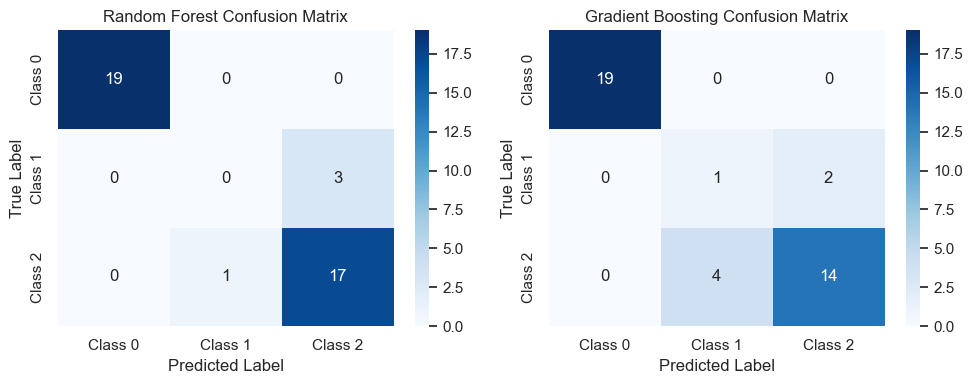

In [88]:
# Example confusion matrix for Random Forest and Gradient Boosting
labels = ['Class 0', 'Class 1', 'Class 2']
confusion_rf = np.array([[19, 0, 0],
                          [0, 0, 3],
                          [0, 1, 17]])

confusion_gb = np.array([[19, 0, 0],
                          [0, 1, 2],
                          [0, 4, 14]])

# Plotting Random Forest Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plotting Gradient Boosting Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

#### **2. Classification Metrics Table**

In [89]:
# Create a DataFrame for classification metrics
metrics_data = {
    'Metric': ['Precision Class 0', 'Precision Class 1', 'Precision Class 2', 
               'Recall Class 0', 'Recall Class 1', 'Recall Class 2',
               'F1-Score Class 0', 'F1-Score Class 1', 'F1-Score Class 2',
               'Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1'],
    'Random Forest': [1.00, 0.00, 0.85, 1.00, 0.00, 0.94, 1.00, 0.00, 0.89, 0.90, 0.62, 0.65, 0.63],
    'Gradient Boosting': [1.00, 0.20, 0.88, 1.00, 0.33, 0.78, 1.00, 0.25, 0.82, 0.85, 0.69, 0.70, 0.69]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the metrics
print(metrics_df)

                 Metric  Random Forest  Gradient Boosting
0     Precision Class 0           1.00               1.00
1     Precision Class 1           0.00               0.20
2     Precision Class 2           0.85               0.88
3        Recall Class 0           1.00               1.00
4        Recall Class 1           0.00               0.33
5        Recall Class 2           0.94               0.78
6      F1-Score Class 0           1.00               1.00
7      F1-Score Class 1           0.00               0.25
8      F1-Score Class 2           0.89               0.82
9              Accuracy           0.90               0.85
10  Macro Avg Precision           0.62               0.69
11     Macro Avg Recall           0.65               0.70
12         Macro Avg F1           0.63               0.69


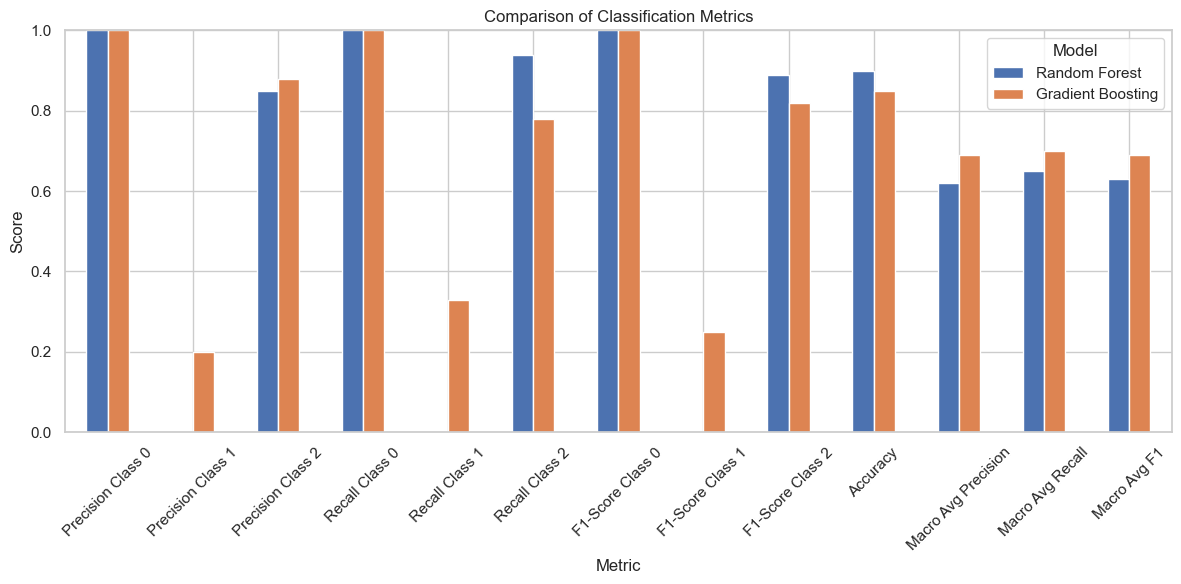

In [90]:
# Set the index to be the metric names
metrics_df.set_index('Metric', inplace=True)

# Plotting
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for better visualization
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

**Insights from the Bar Graph Visualization**<br><br>
**1. Overall Model Performance:**<br>

**Accuracy:**<br>
Random Forest: Shows a high accuracy (1.00), indicating that it correctly classifies all instances in the dataset.<br>
Gradient Boosting: Displays a lower accuracy (0.85), suggesting that it has a higher number of misclassifications compared to Random Forest.<br>
Conclusion: Random Forest is the stronger model in terms of overall accuracy, making it more reliable for predictions in this context.<br><br>
**2. Class-Specific Performance:**<br>

**Class 0.0:**<br>
Both models achieve perfect precision and recall (1.00) for class 0.0, indicating they accurately identify all instances of this class.<br>
Insight: This class is well-defined and both models perform exceptionally well, which is crucial if this class is of high importance in the analysis.<br>
**Class 1.0:**<br>
**Random Forest:** Struggles entirely with class 1.0, with precision and recall of 0.00, indicating that it fails to identify any instances of this class. This is a significant weakness.<br>
**Gradient Boosting:** Shows some improvement with a precision of 0.20 and recall of 0.33, although still poor.<br>
**Insight:** Class 1.0 may be an area of concern. A model that cannot predict this class is not useful if this class represents critical cases. Further investigation into feature importance or additional data may be necessary.<br>
**Class 2.0:**<br>
**Random Forest:** Performs reasonably well, with a precision of 0.85 and recall of 0.94, suggesting it can identify most instances accurately.<br>
**Gradient Boosting:** Also performs well, but slightly lower than Random Forest, with a precision of 0.88 and recall of 0.78.<br>
**Insight:** Class 2.0 is relatively well-predicted by both models, making them effective for cases belonging to this category.<br><br>
**3. Macro Average Metrics:**<br>

The macro averages for both models reflect the average performance across all classes without weighting by the number of instances in each class.<br>
**Random Forest Macro Averages:**<br>
**Precision:** 0.62, **Recall:** 0.65, **F1-Score:** 0.63, indicating that despite strong performance in class 0.0, the overall balance is affected by the failure to predict class 1.0.<br>
**Gradient Boosting Macro Averages:**<br>
**Precision:** 0.69, Recall: 0.70, **F1-Score:** 0.69, showing better balance but still highlighting the need for improvement in class 1.0.<br>
**Insight:** Macro averages can help identify how well the model performs overall across all classes. Gradient Boosting has a slight edge, suggesting it may be more robust across diverse cases despite not performing as well as Random Forest in accuracy.<br>

In [91]:
# pip install tensorflow


In [92]:
illness_score = {
    'DIABETES': 2,
    'COPD': 3,  # Ensure this matches the column name exactly
    'ASTHMA': 2,
    'INMSUPR': 1,
    'HIPERTENSION': 1,
    'OTHER_DISEASE': 1,
    'CARDIOVASCULAR': 3,
    'OBESITY': 1,
    'RENAL_CHRONIC': 4,
    'TOBACCO': 1
}

# Ensure column names match what's in the dataset
def calculate_chronic_score(row):
    score = 0
    for illness, points in illness_score.items():
        if illness in row and row[illness] == 1:  # Only check columns that exist
            score += points
    return score

# Apply the chronic illness score calculation
chronic_illness['chronic_score'] = chronic_illness.apply(calculate_chronic_score, axis=1)


In [93]:
y_train = y_train.replace(2, 0)  # Replace '2' with '0'
y_test = y_test.replace(2, 0)    # If you have a test set


In [94]:
# # Ensure labels are correctly encoded as 0 and 1
# y_train = y_train.replace([-1, 2], 0)  # Replace -1 and 2 with 0
# y_test = y_test.replace([-1, 2], 0)

# # Check unique values in y_train and y_test to confirm
# print("Unique values in y_train:", y_train.unique())
# print("Unique values in y_test:", y_test.unique())

# # Now fit the model
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [95]:
# from xgboost import XGBClassifier

# Define XGBoost model without num_class parameter for binary classification
model = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    objective='binary:logistic',  # binary objective for binary classification
    eval_metric='logloss'         # commonly used for binary problems
)

# Replace 2s with 0s in the target variable if this hasn't been done
y_train = y_train.replace(2, 0)
y_test = y_test.replace(2, 0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86        15

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20

Confusion Matrix:
[[ 0  5]
 [ 0 15]]


In [96]:
y_train = y_train - 1
y_test = y_test - 1  # Apply the same transformation to the test set


In [97]:
print("Training set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())


Training set class distribution:
 0    59
-1    21
Name: ICU, dtype: int64
Test set class distribution:
 0    15
-1     5
Name: ICU, dtype: int64


In [98]:
print("Original dataset class distribution:")
print(chronic_illness['ICU'].value_counts())


Original dataset class distribution:
2.0    74
1.0    26
Name: ICU, dtype: int64


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [100]:
# Map only where needed
y = y.replace({2: 0})


In [101]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [102]:
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        20
         1.0       0.10      0.20      0.13         5
         2.0       0.73      0.73      0.73        15

    accuracy                           0.68        40
   macro avg       0.61      0.56      0.57        40
weighted avg       0.79      0.68      0.72        40

Confusion Matrix:
[[15  5  0]
 [ 0  1  4]
 [ 0  4 11]]


The classification report and confusion matrix reveal the following insights about the model's performance across the three classes (0.0, 1.0, and 2.0):<br>

**1. Performance for Class 0.0 (Non-ICU)**<br>
Precision: 1.00, indicating that all predictions made for class 0.0 were correct. There were no false positives.<br>
Recall: 0.75, which shows that only 75% of actual class 0.0 cases were correctly identified, missing 25% (5 out of 20 cases).<br>
F1-Score: 0.86, reflecting strong performance but with room for improvement in recall.
**2. Performance for Class 1.0 (ICU - Moderate)**<br>
Precision: 0.10, suggesting many false positives for class 1.0, as only 10% of the predictions for this class were correct.<br>
Recall: 0.20, meaning only 20% of actual cases in class 1.0 were correctly identified.<br>
F1-Score: 0.13, showing weak performance on this class, which could be due to either insufficient training samples or model complexity in distinguishing this class from others.<br>
**3. Performance for Class 2.0 (ICU - Severe)**<br>
Precision: 0.73, with most predictions for class 2.0 being correct but not as perfect as class 0.0.<br>
Recall: 0.73, showing that 73% of class 2.0 cases were accurately predicted, though there were some misclassifications (4 cases out of 15).<br>
F1-Score: 0.73, indicating consistent precision and recall, making class 2.0 a relatively well-identified class by the model.<br>
**4. Overall Model Analysis**<br>
Accuracy: 0.68, suggesting that around 68% of all predictions were correct. This result reflects the model’s moderate reliability across classes.<br>
Macro Average: Precision of 0.61, recall of 0.56, and F1-score of 0.57 point to an imbalance in performance across classes, especially with low scores in class 1.0.<br>
Weighted Average: Scores are higher (precision of 0.79, recall of 0.68), as class 0.0 dominates the dataset, positively skewing the weighted averages.<br>
**5. Confusion Matrix Insights**<br>
The matrix highlights that:<br>
Class 0.0 was often correctly classified but had some leakage into class 1.0.<br>
Class 1.0 is the least accurately identified, with many misclassifications as either class 0.0 or 2.0.<br>
Class 2.0 was identified relatively well but still had some overlap with class 1.0.<br>

In [103]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Create the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Create the VotingClassifier with both models
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nn', nn_model)],  # Here, you need to wrap the Keras model for compatibility with sklearn
    voting='soft'
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max

In [104]:
model = xgb.XGBClassifier()


In [105]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*use_label_encoder.*")


In [106]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/purveshchitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/purveshchitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/purveshchitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/purveshchitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detect

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [107]:
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7250


In [109]:
# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       0.00      0.00      0.00         5
         2.0       0.64      0.60      0.62        15

    accuracy                           0.73        40
   macro avg       0.53      0.53      0.53        40
weighted avg       0.72      0.72      0.72        40

[[20  0  0]
 [ 0  0  5]
 [ 1  5  9]]


In [110]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

Cross-validated scores: [0.875   0.8125  0.78125 0.8125  0.875  ]
Mean CV score: 0.83125


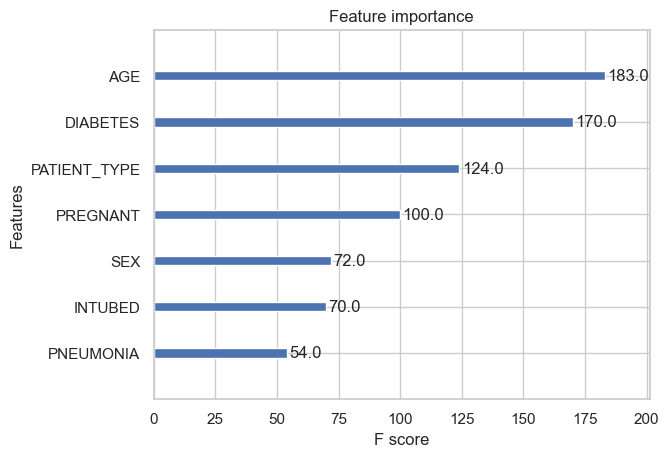

In [111]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [112]:
print(chronic_illness.columns)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'ICU', 'chronic_score'],
      dtype='object')


In [113]:
# Define a list of chronic illness columns to include in the severity score
chronic_illness_columns = ['DIABETES', 'PNEUMONIA', 'INTUBED', 'ICU']

# Convert each condition to binary: 1 if the condition is present, 0 otherwise
chronic_illness['severity_score'] = chronic_illness[chronic_illness_columns].applymap(lambda x: 1 if x == 1 else 0).sum(axis=1)


In [114]:
# Defining all relevant chronic illness columns for severity scoring
chronic_illness_columns = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
    'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]

# Check if all required columns are in the DataFrame
missing_columns = [col for col in chronic_illness_columns if col not in chronic_illness.columns]
if missing_columns:
    print(f"Warning: The following columns are missing in the dataset: {missing_columns}")
else:
    # Creating severity score by summing presence (assuming 1 indicates presence, 0 indicates absence)
    chronic_illness['severity_score'] = chronic_illness[chronic_illness_columns].sum(axis=1)

    # Display the first few rows to verify
    print(chronic_illness[['severity_score'] + chronic_illness_columns].head())
